In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
titanicdata=pd.read_csv(r"D:\Titanic-Dataset.csv")
titanicdata.info
titanicdata.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [2]:
cat_cols = titanicdata.select_dtypes(include=['object', 'category']).columns
print(cat_cols)
titanicdata.describe()
titanicdata.columns
titanicdata.shape
titanicdata.isnull()

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [3]:
titanicdataclean = titanicdata.dropna(axis=0)
titanicdataclean=titanicdata.dropna(axis=1)
print(titanicdataclean.isnull().sum().sum())

0


In [ ]:
le = LabelEncoder()
titanicdata['Sex'] = le.fit_transform(titanicdata['Sex'])
titanicdataencode=pd.get_dummies(titanicdata,columns=['Embarked'], drop_first=True)

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=titanicdata)
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Columns")
plt.show()

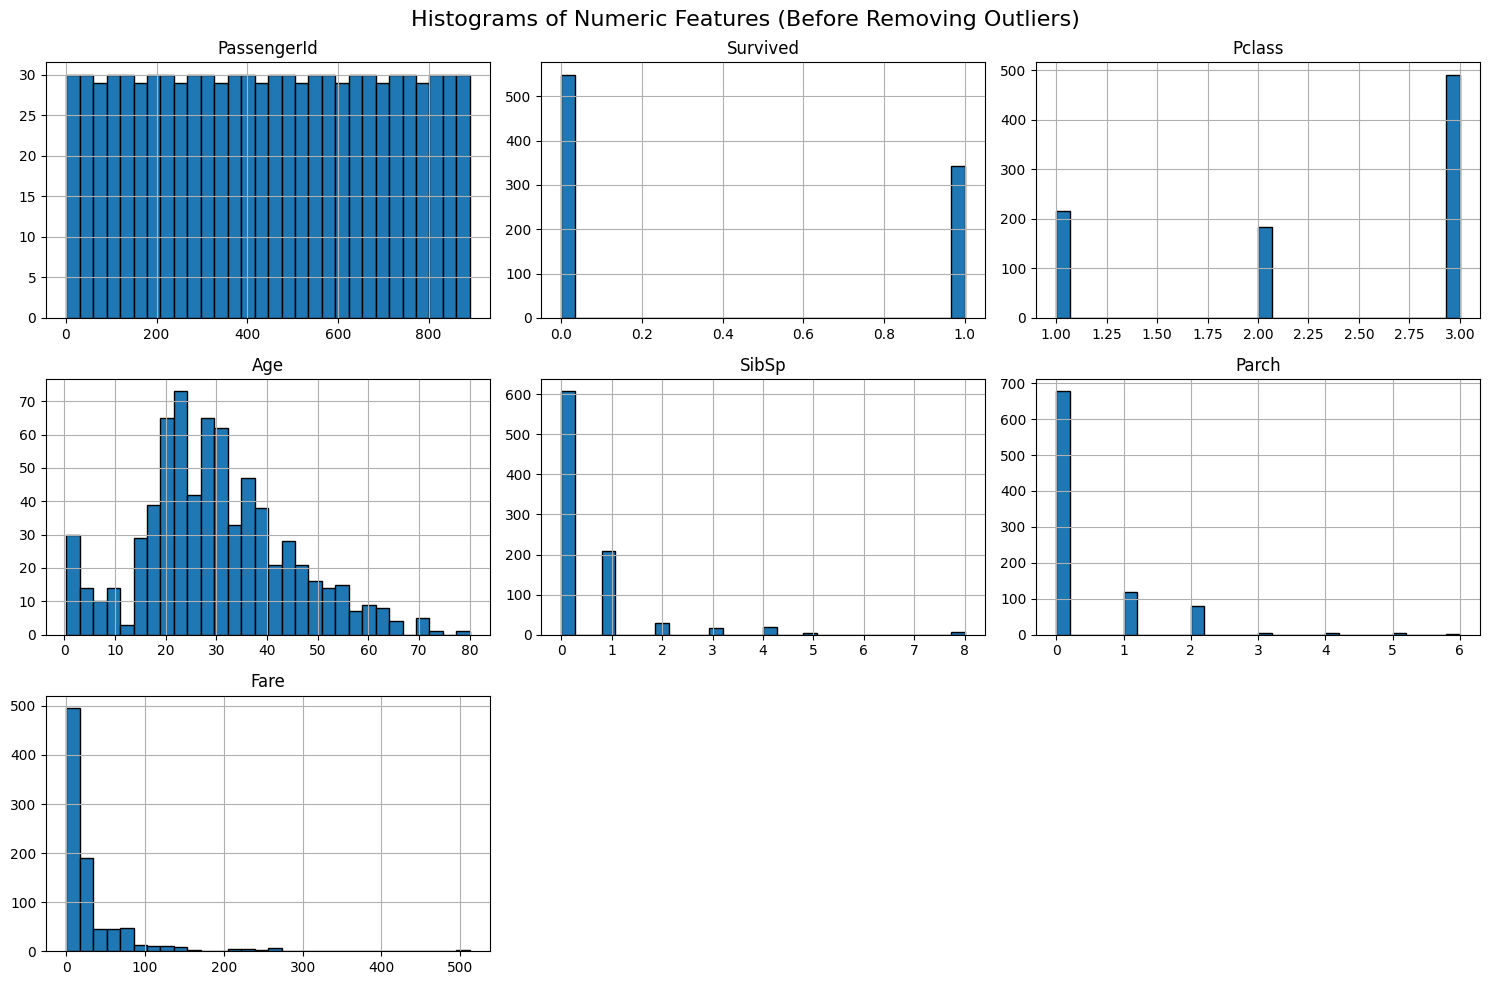

In [6]:
numeric_cols = titanicdata.select_dtypes(include=['number']).columns
titanicdata[numeric_cols].hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle("Histograms of Numeric Features (Before Removing Outliers)", fontsize=16)
plt.tight_layout()
plt.show()


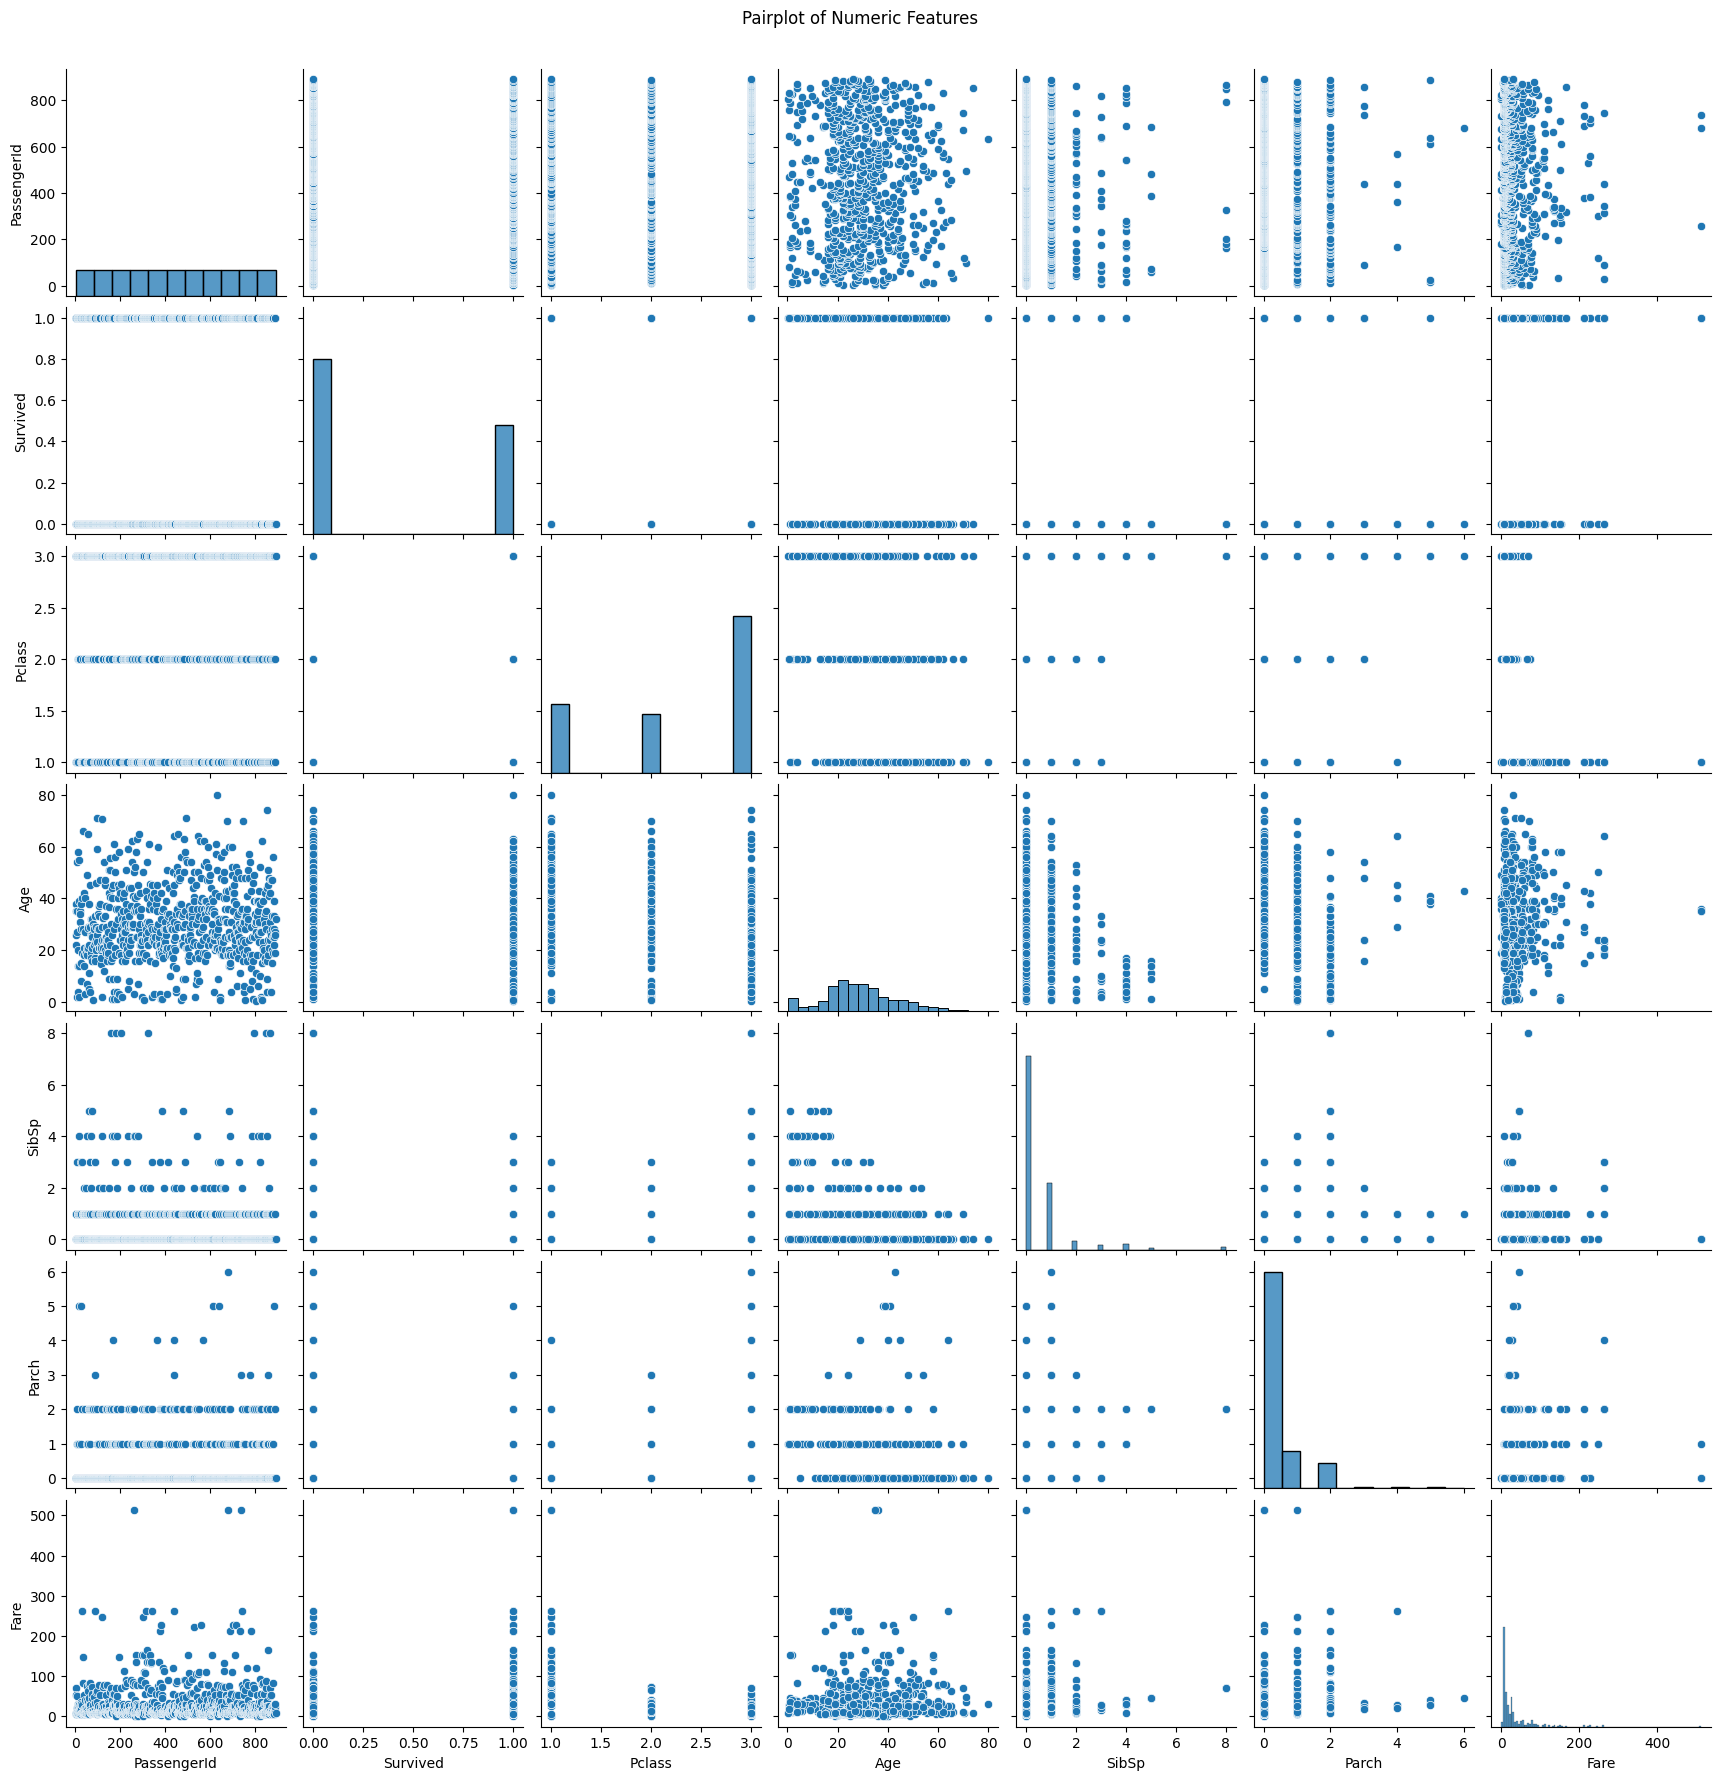

In [7]:
sns.pairplot(titanicdata[numeric_cols])  # Or df_cleaned[numeric_cols]
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()


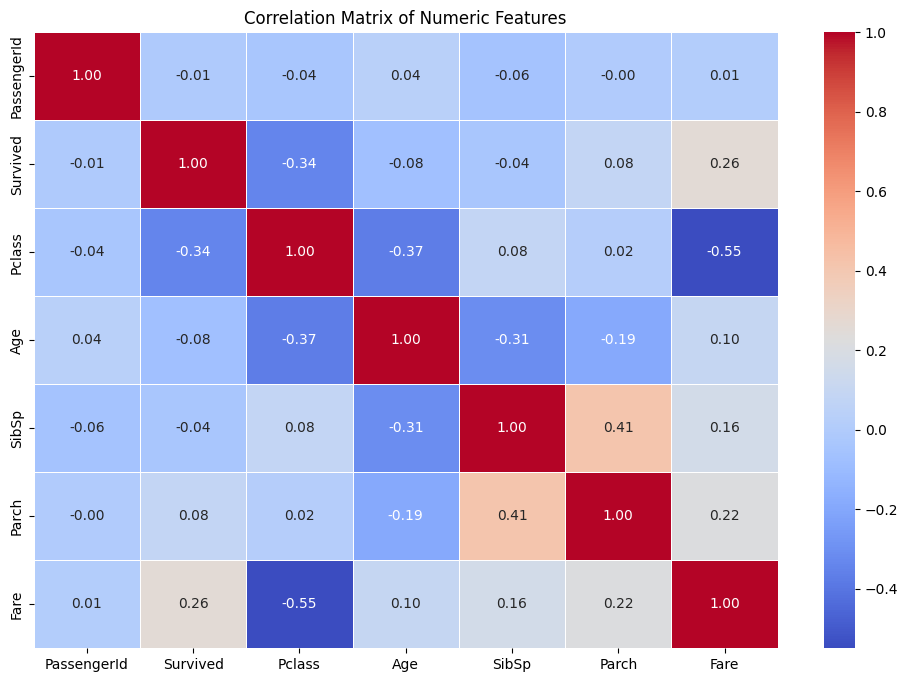

In [ ]:
corr_matrix = titanicdata[numeric_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()
